# Questions to answer:
1. Determine all the variable types and find the fraction of the missing values for each variable.
1. Notice that the data has a time dimension (year). For this assessment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
1. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
1. This time, fill in the missing values using interpolation (extrapolation).
1. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

In [22]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

usedu_df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

## 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [24]:
# Check the variable types.
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [25]:
# Visually confirm that the variable types shown above are correct.
usedu_df.head(60)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [26]:
# Are null values shown as true null values?
usedu_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1488,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1489,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1490,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False


In [27]:
for column_name in usedu_df.columns:
    print("Unique values in column {} are {}".format(column_name, usedu_df[column_name].unique()))

Unique values in column PRIMARY_KEY are ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2017_WEST_VIRGINIA'
 '2017_WISCONSIN' '2017_WYOMING']
Unique values in column STATE are ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_EDU

In [28]:
# Get the fraction of the missing values for each variable.
usedu_df.isnull().sum()/usedu_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

## 2. Notice that the data has a time dimension (year). For this assessment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [29]:
usedu_sameyr = usedu_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", 
             "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
             "SUPPORT_SERVICES_EXPENDITURE", 
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE",
             "GRADES_PK_G", "GRADES_KG_G", "GRADES_4_G",
             "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE",
             "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", 
             "AVG_READING_8_SCORE"]

for col in fill_list:
    usedu_sameyr.loc[:, col] = usedu_sameyr.loc[:, col].fillna(usedu_sameyr.loc[:, col].mean())

## 3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [30]:
usedu_eachyr = usedu_df.copy()

years = usedu_eachyr["YEAR"].unique()

for col in fill_list:
    for year in years:
        usedu_eachyr.loc[usedu_eachyr["YEAR"] == year, col] = usedu_eachyr.loc[usedu_eachyr["YEAR"] == year, col].fillna(usedu_eachyr[usedu_eachyr["YEAR"] == year][col].mean())

## 4. This time, fill in the missing values using interpolation (extrapolation).

In [31]:
usedu_interpol = usedu_df.copy()

for col in fill_list:
    usedu_interpol.loc[:, col] = usedu_interpol.loc[:,col].interpolate()

## 5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

In [32]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([usedu_df[col], usedu_sameyr[col], usedu_eachyr[col], usedu_interpol[col]], axis = 1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

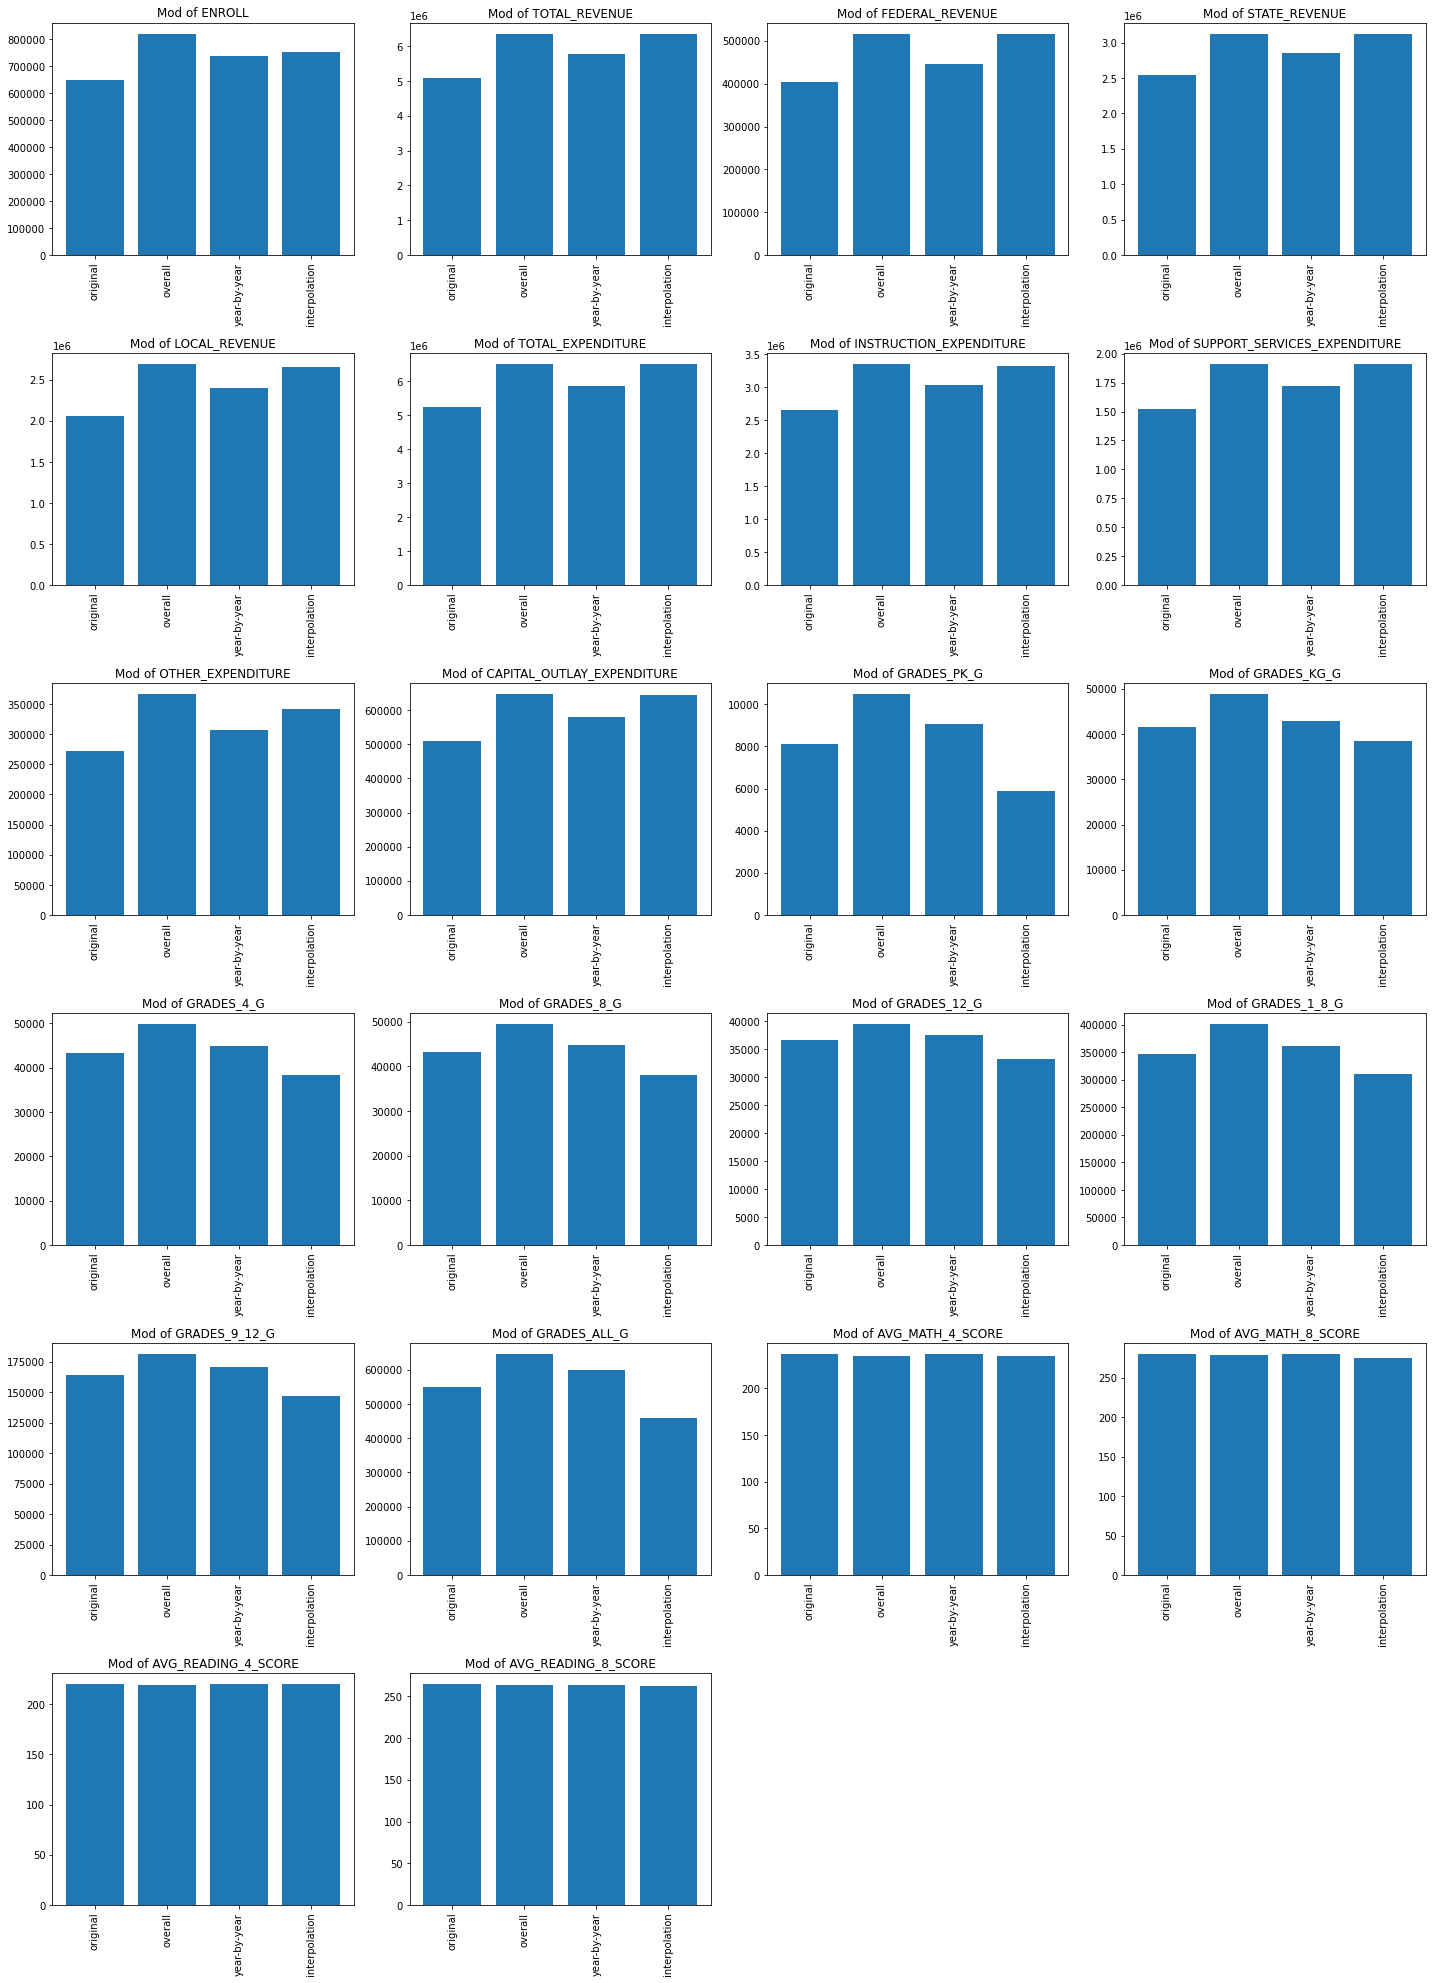

In [33]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([usedu_df[col], usedu_sameyr[col], usedu_eachyr[col], usedu_interpol[col]], axis=1)
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()